<a href="https://colab.research.google.com/github/MUbarak123-56/qiskit-work/blob/master/variational-algos/examples_applications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q qiskit
!pip install -q pylatexenc
!pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.7/112.7 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/qiskit-community/qiskit-textbook.git to /tmp/pip-req-build-6v14227i
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/qiskit-textbook.git /tmp/pip-req-build-6v14227i
  Resolved https://github.com/qiskit-community/qiskit-textbook.git to commit 0ae9

In [2]:
from qiskit.quantum_info import SparsePauliOp

observable_1 = SparsePauliOp.from_list([("II", 2), ("XX", -2), ("YY", 3), ("ZZ", -3)])

In [4]:
!pip install -q qiskit-ibm-runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.9/130.9 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.7/298.7 kB 9.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.9/242.9 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 8.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 13.5 MB/s eta 0:00:00


In [5]:
from qiskit.circuit.library import TwoLocal
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, Estimator, Session

def cost_func_vqe(params, ansatz, hamiltonian, estimator):
    """Return estimate of energy from estimator

    Parameters:
        params (ndarray): Array of ansatz parameters
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
        estimator (Estimator): Estimator primitive instance

    Returns:
        float: Energy estimate
    """
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params).result().values[0]
    return cost

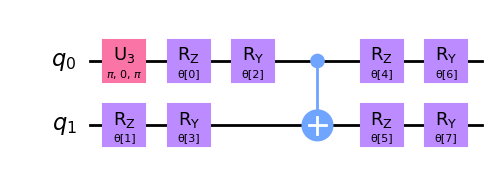

In [6]:
import numpy as np

reference_circuit = QuantumCircuit(2)
reference_circuit.x(0)

variational_form = TwoLocal(
    2,
    rotation_blocks=["rz", "ry"],
    entanglement_blocks="cx",
    entanglement="linear",
    reps=1,
)
ansatz = reference_circuit.compose(variational_form)

ansatz.decompose().draw('mpl')

In [7]:
%run cred.sh

<Figure size 640x480 with 0 Axes>

In [9]:
# IBM Qiskit Runtime
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import Estimator, Sampler, Session

# Add your token below
#service = QiskitRuntimeService(channel='ibm_quantum')
backend = service.get_backend("ibmq_qasm_simulator")

session = Session(backend=backend)

estimator = Estimator(session=session)
sampler = Sampler(session=session)

In [10]:
import numpy as np

x0 = np.ones(8)

In [11]:
# SciPy minimizer routine
from scipy.optimize import minimize
import time

start_time = time.time()

result = minimize(cost_func_vqe, x0, args=(ansatz, observable_1, estimator), method="COBYLA")

end_time = time.time()
execution_time = end_time - start_time

In [12]:
result

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -5.9945
       x: [ 2.125e+00  7.998e-01  1.567e+00  3.425e-02  2.512e+00
            6.186e-01  8.043e-01  7.972e-01]
    nfev: 93
   maxcv: 0.0

In [ ]:
from numpy.linalg import eigvalsh

solution_eigenvalue = min(eigvalsh(observable_1.to_matrix()))

### Experimenting to improve speed and accuracy

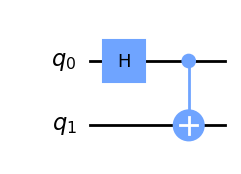

In [14]:
from qiskit import QuantumCircuit

ideal_qc = QuantumCircuit(2)
ideal_qc.h(0)
ideal_qc.cx(0, 1)

ideal_qc.draw("mpl")

In [15]:
from qiskit.quantum_info import Statevector

Statevector(ideal_qc)

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


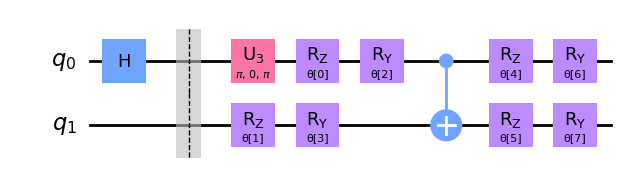

In [16]:
reference = QuantumCircuit(2)
reference.h(0)
# Include barrier to separate reference from variational form
reference.barrier()

ref_ansatz = ansatz.decompose().compose(reference, front=True)

ref_ansatz.draw("mpl")

In [17]:
import time

start_time = time.time()

ref_result = minimize(cost_func_vqe, x0, args=(ref_ansatz, observable_1, estimator), method="COBYLA")

end_time = time.time()
execution_time = end_time - start_time

In [18]:
experimental_min_eigenvalue_ref = cost_func_vqe(result.x, ansatz, observable_1, estimator)
print(experimental_min_eigenvalue_ref)

-5.993


In [19]:
print("ADDED REFERENCE STATE:")
print(f"""Number of iterations: {result.nfev}""")
print(f"""Time (s): {execution_time}""")
print(
    f"Percent error: {abs((experimental_min_eigenvalue_ref - solution_eigenvalue)/solution_eigenvalue):.2e}"
)

ADDED REFERENCE STATE:
Number of iterations: 93
Time (s): 323.10196805000305
Percent error: 1.17e-03


#### Change the initial point

In [20]:
import time

start_time = time.time()

x0 = [0, 0, 0, 0, 6, 0, 0, 0]

x0_1_result = minimize(cost_func_vqe, x0, args=(ansatz, observable_1, estimator), method="COBYLA")

end_time = time.time()
execution_time = end_time - start_time

In [21]:
print("INITIAL POINT 1:")
print(f"""Number of iterations: {x0_1_result.nfev}""")
print(f"""Time (s): {execution_time}""")

INITIAL POINT 1:
Number of iterations: 93
Time (s): 336.8183274269104


Adjusting inital point to θ0⃗=(6,6,6,6,6,6,6,6,6)\vec{\theta_0}=(6,6,6,6,6,6,6,6,6)
θ
0
​

​
 =(6,6,6,6,6,6,6,6,6):

In [22]:
import time

start_time = time.time()

x0 = 6 * np.ones(8)

x0_2_result = minimize(cost_func_vqe, x0, args=(ansatz, observable_1, estimator), method="COBYLA")

end_time = time.time()
execution_time = end_time - start_time

#### Experimenting with different optimizers

In [23]:
import time
start_time = time.time()

result = minimize(cost_func_vqe, x0, args=(ansatz, observable_1, estimator), method="BFGS")

end_time = time.time()
execution_time = end_time - start_time

In [24]:
print("CHANGED TO BFGS OPTIMIZER:")
print(f"""Number of iterations: {result.nfev}""")
print(f"""Time (s): {execution_time}""")

CHANGED TO BFGS OPTIMIZER:
Number of iterations: 274
Time (s): 984.7935309410095


### Optimization: MaxCut

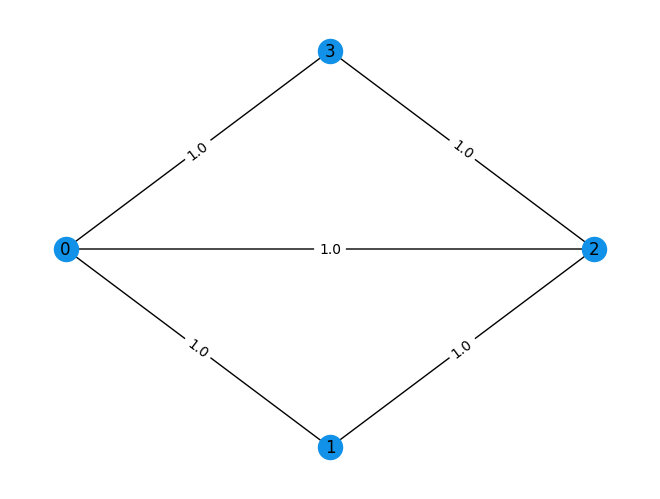

In [25]:
import rustworkx as rx
from rustworkx.visualization import mpl_draw

n = 4
G = rx.PyGraph()
G.add_nodes_from(range(n))
# The edge syntax is (start, end, weight)
edges = [(0, 1, 1.0), (0, 2, 1.0), (0, 3, 1.0), (1, 2, 1.0), (2, 3, 1.0)]
G.add_edges_from(edges)

mpl_draw(G, pos=rx.shell_layout(G), with_labels=True, edge_labels=str, node_color="#1192E8")

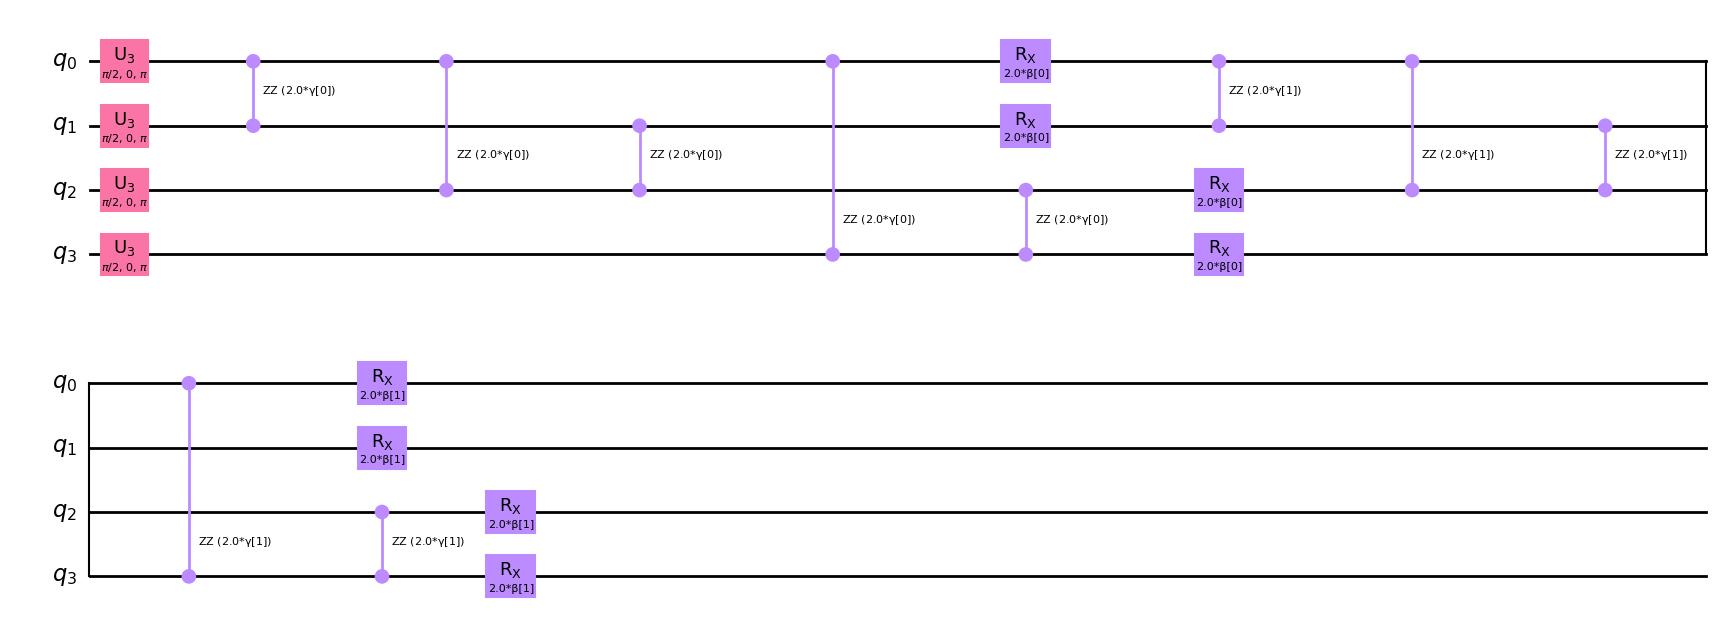

In [26]:
from qiskit.circuit.library import QAOAAnsatz
from qiskit.quantum_info import SparsePauliOp

hamiltonian = SparsePauliOp.from_list([
    ("IIZZ", 1), ("IZIZ", 1), ("IZZI", 1), ("ZIIZ", 1), ("ZZII", 1)
])


ansatz = QAOAAnsatz(hamiltonian, reps=2)
# Draw
ansatz.decompose(reps=3).draw("mpl")

In [27]:
# Sum the weights, and divide by 2

offset = - sum(edge[2] for edge in edges) / 2
print(f"""Offset: {offset}""")

Offset: -2.5


In [31]:
def cost_func(params, ansatz, hamiltonian, estimator):
    """Return estimate of energy from estimator

    Parameters:
        params (ndarray): Array of ansatz parameters
        ansatz (QuantumCircuit): Parameterized ansatz circuit
        hamiltonian (SparsePauliOp): Operator representation of Hamiltonian
        estimator (Estimator): Estimator primitive instance

    Returns:
        float: Energy estimate
    """
    cost = estimator.run(ansatz, hamiltonian, parameter_values=params).result().values[0]
    return cost

In [32]:
# IBM Qiskit Runtime
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import Estimator, Sampler, Session

# SciPy minimizer routine
from scipy.optimize import minimize

# Add your token below
#service = QiskitRuntimeService(channel='ibm_quantum')
backend = service.get_backend("ibmq_qasm_simulator")

session = Session(backend=backend)

estimator = Estimator(session=session)
sampler = Sampler(session=session)

In [33]:
import numpy as np

x0 = 2 * np.pi * np.random.rand(ansatz.num_parameters)

In [34]:
result = minimize(cost_func, x0, args=(ansatz, hamiltonian, estimator), method="COBYLA")

In [35]:
print(result)

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -1.3410000000000002
       x: [ 2.502e+00  6.038e+00  5.254e+00  6.852e+00]
    nfev: 48
   maxcv: 0.0


In [36]:
eigenvalue = cost_func(result.x, ansatz, hamiltonian, estimator)
print(f"""Eigenvalue: {eigenvalue}""")
print(f"""Max-Cut Objective: {eigenvalue + offset}""")

Eigenvalue: -1.3235
Max-Cut Objective: -3.8235


In [37]:
# Assign solution parameters to ansatz
qc = ansatz.assign_parameters(result.x)

# Add measurements to our circuit
qc.measure_all()

# Sample ansatz at optimal parameters
samp_dist = sampler.run(qc).result().quasi_dists[0]

# Close the session since we are now done with it
session.close()

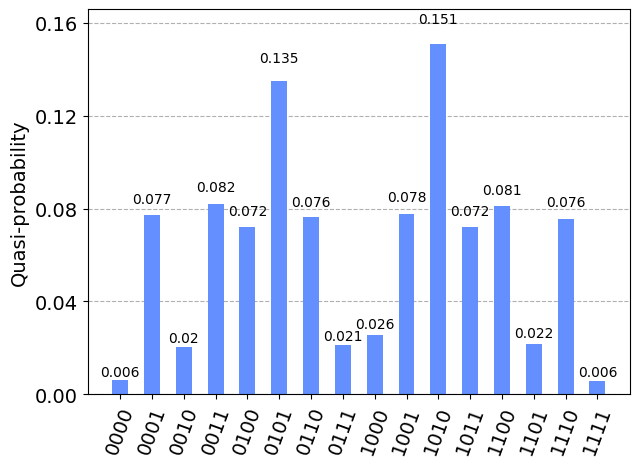

In [38]:
from qiskit.visualization import plot_distribution

probabilities = samp_dist.binary_probabilities()
plot_distribution(probabilities)

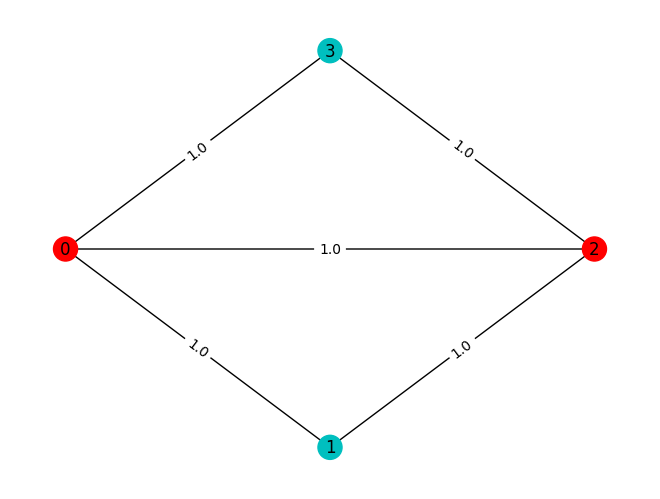

In [39]:
binary_string = max(probabilities.items(), key=lambda kv: kv[1])[0]
x = np.asarray([int(y) for y in reversed(list(binary_string))])

colors = ["r" if x[i] == 0 else "c" for i in range(n)]
mpl_draw(G, pos=rx.shell_layout(G), with_labels=True, edge_labels=str, node_color=colors)